**Question**

Assume that we know the density function is from a class of functions characterized
by several parameters, and we will be dealing with estimating their optimal value. 

In this lab we consider the following:

- the density is modeled by a Normal distribution 
- the unknown parameters will be the
mean and variance of the distribution.

To estimate the parameters, build a training set by drawing i.i.d samples randomly
from the particular distribution.

Implement and evaluate the two parameter estimation methods: Maximum likelihood
(ML) and Maximum a posteriori (MAP).

In order to complete the experiment, do the following:
Start by generating some i.i.d. data D = {x1, x2, . . . , xn} from a univariate Normal
distribution with μ = 0 and $σ^2$ = 1. For most demonstrations n = 50 data points will be enough. But feel free to experiment with larger datasets.

**Maximum Likelihood Estimation**


1. Start by deriving the maximum likelihood estimates of the Normal distribution parameters $μ$ and $σ^2$.

2. Plot the likelihood for a range of values for $μ$ and $σ^2$
. Mark the true and estimated values. Next, plot the true and estimated distributions in one graph.
3. Try to generate data repeatedly while re-drawing these plots. Observe the variations in the estimate by ploting the true and estimated distributions with increasing number
of samples.



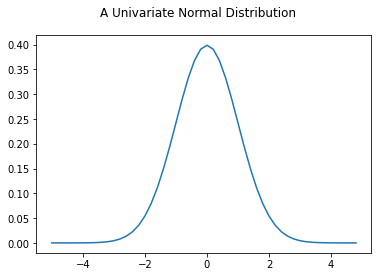

In [16]:
# plotting a Normal distribution PDF with mean=0 and standard deviation = 1. 50 points taken.
# for univariate normal distribution : [-5,5] with step 0.2 taken for x axis.
import math
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

%matplotlib inline

# Plot between -5 and 5 with 0.2 steps amounting to 50 data points
x_axis = np.arange(-5, 5, 0.2)
# Mean = 0, SD = 2.
# norm.pdf(array, mean, std)
plt.plot(x_axis, norm.pdf(x_axis,0,1))
plt.suptitle('A Univariate Normal Distribution')
plt.show()


In [ ]:
# fig 1

**Maximum Likelihood Estimation**

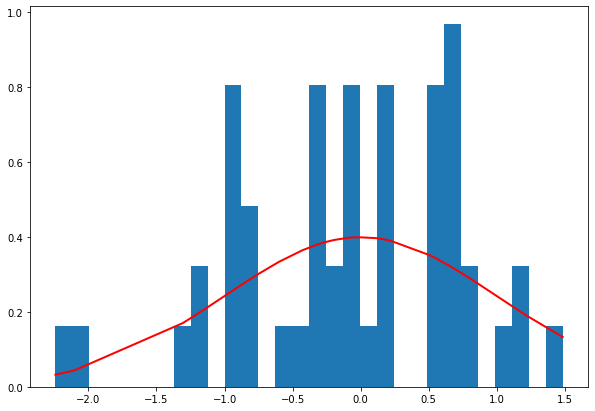

In [17]:
# Normal Distribution

# drawing i.i.d samples randomly from the normal distribution.

# defining a sample with 500 poplulation..
# samples taken random from this is to be used for all other purposes..
mu = 0
sigma = 1

parentDatapoints  = np.random.normal(mu, sigma, 500).tolist()




# datapoints = np.random.normal(mu, sigma, 50)
datapoints = np.asarray(random.sample(parentDatapoints, 50))

#defining the size of the figure.
figure, ax = plt.subplots(1, figsize=(10,7))

# for plotting the histogram and making use of the bins for plotting normal 
#distribution.
count, bins, ignored = plt.hist(datapoints,30, density=True)

# scipy's norm function can also be used inplace of this equation.
ax.plot(np.sort(datapoints), 
        1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (np.sort(datapoints) - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')

plt.show()

In [ ]:
list1 = [2,3 ,3,4, 6,3,7,3]
# random.sample(parentDatapoints.tolist(), 4)

In [ ]:
# fig 2

***Dervation of Maximum LIkelihood Estimation for Normal Distribution ($\mathcal{N}$)***

The Probability density function of Normal distribution is given by 
> $ P(x | \mu, \sigma) = \frac{1}{\sqrt{2\pi}\sigma}e^ \frac{-(x_i-\mu)^2}{2\sigma^2}$

Likelihood,
> $ L(\mu, \sigma | x ) = \frac{1}{\sqrt{2\pi}\sigma}e^ \frac{-(x_i-\mu)^2}{2\sigma^2}$

for multiple datapoints, 
since its $i.i.d$ can be written as,  
> $ L(\mu, \sigma | x_1, x_2,...x_n ) = \frac{1}{\sqrt{2\pi}\sigma} e^ \frac{-(x_1-\mu)^2}{2\sigma^2} \times \frac{1}{\sqrt{2\pi}\sigma} e^ \frac{-(x_2-\mu)^2}{2\sigma^2} \times... \times \frac{1}{\sqrt{2\pi}\sigma} e^ \frac{-(x_n-\mu)^2}{2\sigma^2}$

Lets solve for the maxmum likelihood,
taking derivative of above fn w.r.t $\mu$ keeping $\sigma$ constant and w.r.t $\sigma$ keeping $\mu$ constant.
Before we try to take the derivate , we take $\log$ on both sides to get the maximum log likelihood estimation(This makes taking the derivative way easier). 

> $ \ln [L(\mu, \sigma | x_1, x_2,...x_n )] = \ln(\frac{1}{\sqrt{2\pi}\sigma} e^ \frac{-(x_1-\mu)^2}{2\sigma^2} \times \frac{1}{\sqrt{2\pi}\sigma} e^ \frac{-(x_2-\mu)^2}{2\sigma^2} \times... \times \frac{1}{\sqrt{2\pi}\sigma} e^ \frac{-(x_n-\mu)^2}{2\sigma^2})$

> $ \ln [L(\mu, \sigma | x_1, x_2,...x_n )] = \ln(\frac{1}{\sqrt{2\pi}\sigma} e^ \frac{-(x_1-\mu)^2}{2\sigma^2}) + \ln(\frac{1}{\sqrt{2\pi}\sigma} e^ \frac{-(x_2-\mu)^2}{2\sigma^2}) +....+ \ln(\frac{1}{\sqrt{2\pi}\sigma} e^ \frac{-(x_n-\mu)^2}{2\sigma^2})$

> $ \ln [L(\mu, \sigma | x_1, x_2,...x_n )] = \ln(\frac{1}{\sqrt{2\pi}\sigma})+ \ln( e^ \frac{-(x_1-\mu)^2}{2\sigma^2}) + \ln(\frac{1}{\sqrt{2\pi}\sigma})+\ln( e^ \frac{-(x_2-\mu)^2}{2\sigma^2}) +....+ \ln(\frac{1}{\sqrt{2\pi}\sigma})+ \ln( e^ \frac{-(x_n-\mu)^2}{2\sigma^2})$

finally,

> $ \ln [L(\mu, \sigma | x_1, x_2,...x_n )] = (-\frac{1}{2}\ln(2\pi) + -\ln(\sigma) + \frac{-(x_1-\mu)^2}{\sigma^2}) + .....+ (-\frac{1}{2}\ln(2\pi) + -\ln(\sigma) + \frac{-(x_n-\mu)^2}{2\sigma^2}) $

becomes,

> $ \ln [L(\mu, \sigma | x_1, x_2,...x_n )] = (-\frac{1}{2}\ln(2\pi) -\ln(\sigma) - \frac{(x_1-\mu)^2}{2\sigma^2}) + .....+ (-\frac{1}{2}\ln(2\pi) -\ln(\sigma)  \frac{(x_n-\mu)^2}{2\sigma^2}$
  
---
simplifying,
> $\ln [L(\mu, \sigma | x_1, x_2,...x_n )] = -\frac{n}{2}\ln(2\pi) -n \ln(\sigma) - \frac{(x_1-\mu)^2}{2\sigma^2} - ....-  \frac{(x_n-\mu)^2}{2\sigma^2} $.  ----- **will be used  for calculations below**
---
**Now taking derivative wrt to $\mu$**

> $ \frac{\partial}{\partial \mu}\ln [L(\mu, \sigma | x_1, x_2,...x_n )] = 0 - 0 + \frac{x_1 - \mu}{\sigma^2} + \frac{x_n - \mu}{\sigma^2}  $


> $ \frac{\partial}{\partial \mu}\ln [L(\mu, \sigma | x_1, x_2,...x_n )] = \frac{1}{\sigma^2}(x_1+x_2+..+x_n) - n\mu  $


for maximum likelihood. $\frac{\partial}{\partial \mu} = 0, $ solving
> $\mu = \frac{(x_1+x_2+..+x_n}{n}) $ 

**Hence the maximum likelihood estimate for $\mu$ is the Mean of the Measurements**.


similarly, for $\frac{\partial}{\partial\sigma} $ can be obtined
> $\frac{\partial}{\partial \sigma}\ln [L(\mu, \sigma | x_1, x_2,...x_n )] = 0 - \frac{n}{\sigma} + \frac{(x-\mu)^2}{\sigma^3} +..+\frac{(x-\mu)^2}{\sigma^3}  $

solving for $\frac{\partial}{\partial\sigma} = 0 $, we get,
> $ \sigma = \sqrt {\frac{(x_1 - \mu)^2 + ..+ (x_n-\mu)^2}{n}} $


**Hence the maximum likelihood estimate for $\sigma$ is the Standard Deviation of the Measurements**.

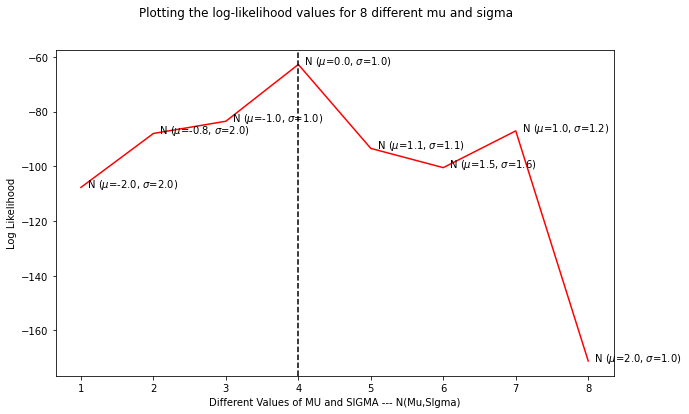

In [18]:
# plotting Log likelihood values for different mu and sigma.. 
# for the same datapoints obatined above

# defining a log likelihood function which returns float value.
#def logLikelihoodFunction(mu, sigma,data):
#  n= len(data)
#  constant = -0.5*n*math.log(2*math.pi) - n*math.log(sigma)
#  remaining = 0
#  for i in range(n):
#    remaining += math.pow(data[i]-mu,2)/(2*math.pow(sigma,2))*-1
#  return constant+remaining


# This can also be used inplace of above function.
# This is the better alternative.
def LogLikelihoodFunction( mu, sigma, data):
 value = np.sum(np.log(norm.pdf(data, mu, sigma)))
 return value

mu1 = np.array([-2,-.8,-1,0,1.1,1.5, 1, 2])
sigma1 = np.array([2,2,1,1,1.1,1.6, 1.2, 1])

# mu1 = np.arange(-2,2,0.2)
# sigma1 = np.arange(0.05,1.05,0.05)

LogLikelihood=[] # defining a empty list for storing log likelihood

# calulating the log likelihood values of above mu1 and sigma1 for analysis
for i in range(len(mu1)):
  LogLikelihood.append(LogLikelihoodFunction(mu1[i], sigma1[i], datapoints))


fig,ax = plt.subplots(1,figsize=(10,6))

# plotting the log-likelihood values obtained above
ax.plot(np.arange(1, len(mu1)+1, 1), LogLikelihood,c="r", 
        label="mu vs likelihood")

# doing the annotation for each observations
for i in range(len(mu1)):
  ax.annotate("  N ($\mu$={}, $\sigma$={}) ".format(mu1[i],sigma1[i]),
               (i+1, LogLikelihood[i]))


plt.xlabel("Different Values of MU and SIGMA --- N(Mu,SIgma)")
plt.ylabel("Log Likelihood")

# to find which observation has the maximum log-likelihood value.
plt.axvline(np.argmax(LogLikelihood) + 1, ls='--', c='black')

# np.argmax() returns the index of the value which is the highest in the list


fig.suptitle("Plotting the log-likelihood values for {} different mu and sigma"
            .format(len(mu1)))

plt.show()
# LogLikelihood

In [26]:
# sigma2 = []
# for i in range(len(mu2)):
#   sigma2.append(random.randint(0,5 ))

# sigma2

np.arange(-6, 6, 0.2)

array([-6.00000000e+00, -5.80000000e+00, -5.60000000e+00, -5.40000000e+00,
       -5.20000000e+00, -5.00000000e+00, -4.80000000e+00, -4.60000000e+00,
       -4.40000000e+00, -4.20000000e+00, -4.00000000e+00, -3.80000000e+00,
       -3.60000000e+00, -3.40000000e+00, -3.20000000e+00, -3.00000000e+00,
       -2.80000000e+00, -2.60000000e+00, -2.40000000e+00, -2.20000000e+00,
       -2.00000000e+00, -1.80000000e+00, -1.60000000e+00, -1.40000000e+00,
       -1.20000000e+00, -1.00000000e+00, -8.00000000e-01, -6.00000000e-01,
       -4.00000000e-01, -2.00000000e-01,  5.32907052e-15,  2.00000000e-01,
        4.00000000e-01,  6.00000000e-01,  8.00000000e-01,  1.00000000e+00,
        1.20000000e+00,  1.40000000e+00,  1.60000000e+00,  1.80000000e+00,
        2.00000000e+00,  2.20000000e+00,  2.40000000e+00,  2.60000000e+00,
        2.80000000e+00,  3.00000000e+00,  3.20000000e+00,  3.40000000e+00,
        3.60000000e+00,  3.80000000e+00,  4.00000000e+00,  4.20000000e+00,
        4.40000000e+00,  

In [33]:
np.argmax(LogLikelihood2)
# LogLikelihood2

30

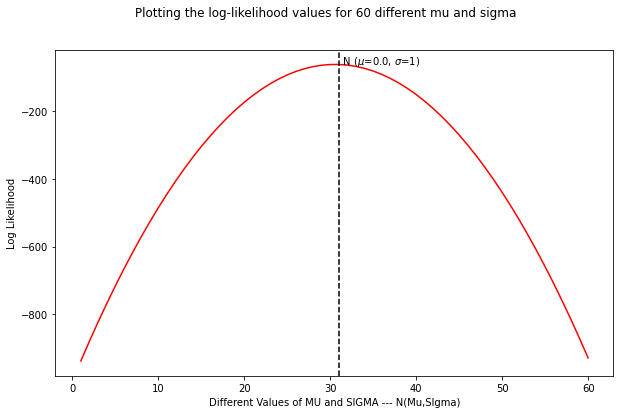

In [34]:
# Likelihood for a big array of samples as shown below


mu2 = np.arange(-6, 6, 0.2)

# Taking random values between o and 5 which has the same length as mu2 array
# sigma2 - random.randint(5, (len(mu2)))

# sigma2 = np.zeros(60)
sigma2 = []

# for i in range(len(mu2)):
#   sigma2.append(random.randint(0,5 ))

for i in range(len(mu2)):
  sigma2.append(1)
 

# creating a list containing all the likelihood valus from above mu2 and sigma2

LogLikelihood2 = []

for i in range(len(mu2)):
  LogLikelihood2.append(LogLikelihoodFunction(mu2[i], sigma2[i], datapoints))


fig,ax = plt.subplots(1,figsize=(10,6))

# plotting the log-likelihood values obtained above
ax.plot(np.arange(1, len(mu2)+1, 1), LogLikelihood2,c="r", 
        label="mu vs likelihood")

# doing the annotation for arg max only 

max = np.argmax(LogLikelihood2)

ax.annotate("    N ($\mu$={}, $\sigma$={}) ".format(np.round(mu2[max],3),sigma2[max]),
               (max, LogLikelihood2[max]), c='black', )

plt.xlabel("Different Values of MU and SIGMA --- N(Mu,SIgma)")
plt.ylabel("Log Likelihood")

# to find which observation has the maximum log-likelihood value.
plt.axvline(max + 1, ls='--', c='black')

# np.argmax() returns the index of the value which is the highest in the list


fig.suptitle("Plotting the log-likelihood values for {} different mu and sigma"
              .format(len(mu2)))

plt.show()

In [ ]:
# testing area
print(np.mean(datapoints))
np.ones(len(mu1))

-0.03689404004285016


array([1., 1., 1., 1., 1., 1., 1., 1.])

From the Above figure , .. 

On testing on different values of $\mu$ and $\sigma$ we can see that The The Maximum Likelihood is predicted at $\mu$ = 0 and $\sigma$ = 1 

**Plotting for 50 sample dataset.**

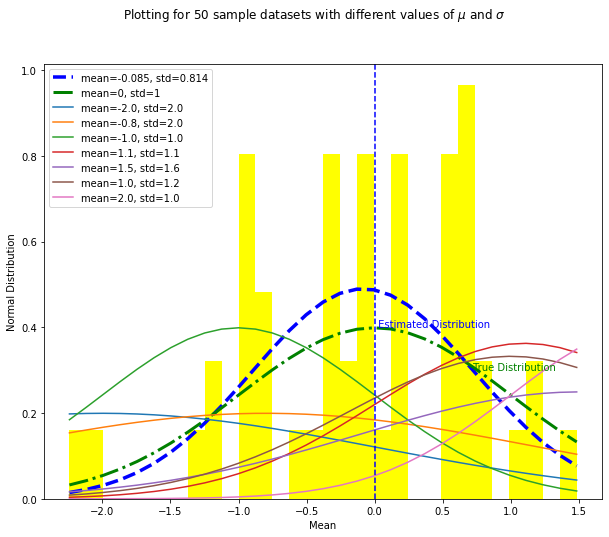

In [53]:
figure, ax = plt.subplots(1, figsize=(10,8))

count, bins, ignored = ax.hist(datapoints,30, density=True, color='yellow')

# we already proved that Maximum-Likelihood Estimate of mu is the mean of 
# the measurements and for sigma = standard deviation.
estimated_mu = np.mean(datapoints)
estimated_sigma= np.std(datapoints)

# plotting the PDF of Estimated Distribution.
ax.plot(bins, norm.pdf(bins,estimated_mu,estimated_sigma),'--', lw=3.5,c='b',
           label='mean={}, std={}'.format(round(np.mean(datapoints), 3),
                                          round(np.std(datapoints),3)))
ax.annotate(" Estimated Distribution", (0,0.4), c='b')

# plotting the PDF of True Distribution
ax.plot(bins, norm.pdf(bins,0,1),'-.', lw=3,color='green',
           label='mean={}, std={}'.format(0,1))
ax.annotate(" True Distribution", (0.7,0.3), c='g')

# plotting the PDF of all the tested mu and std values.
for i in range(len(mu1)):
  if mu1[i]!= 0 or sigma1[i]!= 1:
    # print(mu1[i])
    ax.plot(bins, norm.pdf(bins,mu1[i],sigma1[i]),
            label='mean={}, std={}'.format(mu1[i], sigma1[i]))
  
ax.legend() # to show the legend


plt.axvline(0, ls='--', c='b') # for the vertical line passing through origin
plt.xlabel("Mean")
plt.ylabel("Normal Distribution")


figure.suptitle("Plotting for 50 sample datasets with different values of $\mu$ and $\sigma$")
plt.show()

In [ ]:
# fig 4

**Plotting the true and estimated distributions with increasing number of samples.**

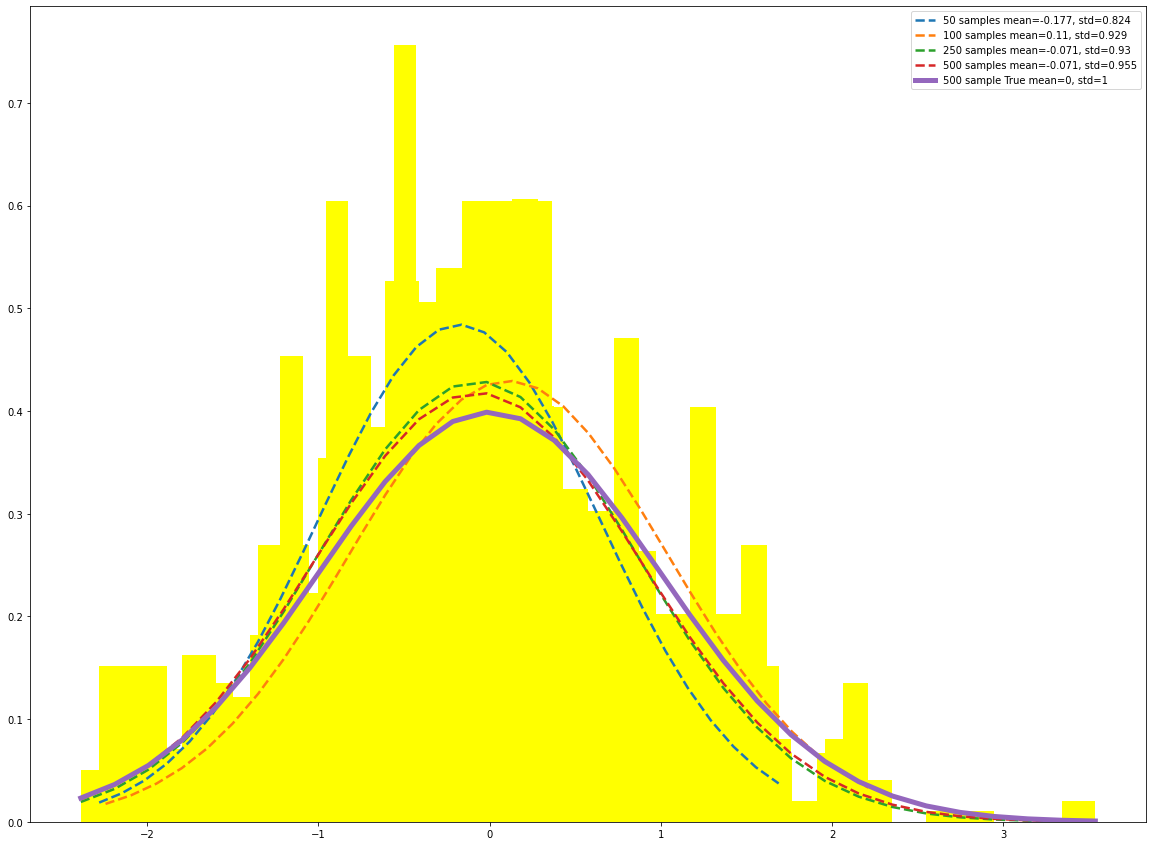

In [54]:
# code necessary for plotting 4 subplots.
# fig, axs = plt.subplots(2, 2, sharex='col', sharey='row',figsize=(10,10),
#                         gridspec_kw={'hspace': 0, 'wspace': 0})
# (ax1, ax2), (ax3, ax4) = axs

fig = plt.figure(figsize=(20,15))
# ax1 = fig.add_subplot(221)
# ax2 = fig.add_subplot(222)
# ax3 = fig.add_subplot(223)
# ax4 = fig.add_subplot(224)

# fig.suptitle('Plotting the true and estimated distributions with increasing number of samples')


mu = 0
sigma = 1

# 4 arrays containing datapoints from a normal distribution

datapoints1 =np.asarray(random.sample(parentDatapoints, 50))
datapoints2 = np.asarray(random.sample(parentDatapoints, 100))
datapoints3 = np.asarray(random.sample(parentDatapoints, 250))
datapoints4 = np.asarray(random.sample(parentDatapoints, 500))

# bins and hists for 4 arrays 
count1, bins1, ignored1 = plt.hist(datapoints1,30, density=True, color='yellow')
count2, bins2, ignored2 = plt.hist(datapoints2,30, density=True, color='yellow')
count3, bins3, ignored3 = plt.hist(datapoints3,30, density=True, color='yellow')
count4, bins4, ignored4 = plt.hist(datapoints4,30, density=True, color='yellow')

# estimating mu and sigma for each array of samples
estimated_mu1 = np.mean(datapoints1)
estimated_sigma1= np.std(datapoints1)

estimated_mu2 = np.mean(datapoints2)
estimated_sigma2= np.std(datapoints2)

estimated_mu3 = np.mean(datapoints3)
estimated_sigma3= np.std(datapoints3)

estimated_mu4 = np.mean(datapoints4)
estimated_sigma4= np.std(datapoints4)

# PLOTTING
# plotting the PDF of Estimated Distribution for subplot 1
plt.plot(bins1, norm.pdf(bins1,estimated_mu1,estimated_sigma1),'--', lw=2.5,
           label='50 samples mean={}, std={}'.format(round(np.mean(datapoints1), 3),
                                          round(np.std(datapoints1),3)))

# # plotting the PDF of True Distribution for subplot 1
# plt.plot(bins1, norm.pdf(bins1,0,1),'-.', lw=2,
#            label='50 samples true mean=0, std=1')
# plt.title.set_text('50 Samples')
plt.legend()


# plotting the PDF of Estimated Distribution for subplot 2
plt.plot(bins2, norm.pdf(bins2,estimated_mu2,estimated_sigma2),'--', lw=2.5,
           label='100 samples mean={}, std={}'.format(round(np.mean(datapoints2), 3),
                                          round(np.std(datapoints2),3)))

# # plotting the PDF of True Distribution for subplot 2
# plt.plot(bins2, norm.pdf(bins2,0,1),'-.', lw=2,
#            label='100 samples mean=0, std=1')
# plt.title.set_text('100 Samples')
plt.legend()


# plotting the PDF of Estimated Distribution for subplot 3
plt.plot(bins3, norm.pdf(bins3,estimated_mu3,estimated_sigma3),'--', lw=2.5,
           label='250 samples mean={}, std={}'.format(round(np.mean(datapoints3), 3),
                                          round(np.std(datapoints3),3)))

# # plotting the PDF of True Distribution for subplot 3
# plt.plot(bins3, norm.pdf(bins3,0,1),'-.', lw=2,
#            label='250 samples mean=0, std=1')
# plt.title.set_text('250 Samples')
plt.legend()


# plotting the PDF of Estimated Distribution for subplot 4
plt.plot(bins4, norm.pdf(bins4,estimated_mu4,estimated_sigma4),'--', lw=2.5,
           label='500 samples mean={}, std={}'.format(round(np.mean(datapoints4), 3),
                                          round(np.std(datapoints4),3)))

# plotting the PDF of True Distribution for subplot 4.
plt.plot(bins4, norm.pdf(bins4,0,1), lw=5,
           label='500 sample True mean=0, std=1')
# plt.title.set_text('500 Samples')
plt.legend()


plt.show()




In [ ]:
# 5


**MAP Estimation**
Consider the problem that we discussed in the class, i.e. use the Normal prior with
mean $\nu$ and variance $\beta^2$

.

1. Start by deriving the MAP estimates of the Normal distribution parameters $μ$ and $σ^2$ .
2. Implement functions which returns the MAP estimate of the parameters given the data and the prior probability parameters.

3. Plot the likelihood, prior and the MAP objective next to each other, together with the MLE and MAP estimates and the prior maximum.
4. Examine the behavior of the MAP estimate compared with the MLE estimate and the prior. Experiment with
  - repeatedly sampling the dataset and observing the variations in the estimate
  - changing the prior parameters to see their effect on the estimate

In [ ]:
# need normal prior with mean  and variance
# derive map estimate fo normal distribution .

# create a function which retruns MAP estimate of the parameter given the data 
# and prior probs.


**Derivation of MAP (Univariate Normal distribution)**

Given data
>$D=(x_1, x_2, ...x_n) , x_i \in $ **R**$^n$ 

> Assume a joint distribution $P(D, \theta)$ ; where $\theta$ is a random variable(r.v).

> $ \hat{\theta}_{MAP} = arg_\theta \: max P(\theta | D) $ ; where $P(\theta | D)$ is the posterior distribution on $\theta$
 given the data $D$.


By bayes rule.,

>$ \hat{\theta}_{MAP} = arg_\theta\:max \frac{P(D|\theta).P(\theta)}{P(D)}    $

where $P(\theta)$ = Prior knowledge of $\theta$, $\: P(D|\theta) $ = Likelihood, P(D) = does not depend on $\theta$ 

>$ \hat{\theta}_{MAP} = arg_\theta\:max P(D|\theta).P(\theta) $

Taking log ;

>$ \hat{\theta}_{MAP} = arg_\theta\:max [ \log{P(D|\theta)} + \log{P(\theta)}] $

>$ \hat{\theta}_{MAP} = arg_\theta\:max [\sum \log{P(x_i|\theta)} + \log{P(\theta)}] $

where $\log{P(\theta)}$ is the Regularisation Term.

>$ X_1, X_2, ...X_n \backsim N(\mu, \sigma^2) $ is i.i.d given $\mu;$

>$\mu \backsim N(\nu,\beta^2)$. Assuming $\sigma^2, \beta^2, \nu$ are known .. and ($\theta = \mu$)

>$ \hat{\mu}_{MAP} = arg_\mu \: max \sum \limits_{i=1}^n\log{P(x_i|\mu, \sigma^2)} + \log{P(\mu)}$

>$ \hat{\mu}_{MAP} = arg_\mu \: max \sum\limits_{i=1}^n \log{\frac{1}{\sqrt{2 \pi \sigma^2}}}e^{\frac{-(x_i - \mu)^2}{2 \sigma^2}} + \log{\frac{1}{\sqrt{2 \pi \beta^2}}}e^{\frac{-(\nu - \mu)^2}{2 \beta^2}}   $

solving for $\mu$,

> $ \hat{\mu}_{MAP} = \frac{\sigma^2 \nu + \frac{n}{n}\beta^2 \sum \limits_{i=1}^n x_i}{\sigma^2 + n \beta^2}  = \frac{\sigma^2 \nu + n\beta^2 \sum \limits_{i=1}^n \frac{x_i}{n}}{\sigma^2 + n \beta^2} 

=  \frac{\sigma^2 \nu + n \beta^2 \bar{x}}{\sigma^2 + n \beta^2} $;
where $\bar{x}$ is the sample Mean.

so therfore as we derived earlier  $\bar{\mu} = \hat{\mu}_{MLE}$

Above equation can also be written as,

> $ =  \frac{\sigma^2}{\sigma^2 + n \beta^2}\nu + \frac{n \beta^2}{\sigma^2 + n \beta^2} \bar{\mu} \: \: \: $  - - - - - - $\:$ (1)

where $C_1 = \frac{\sigma^2}{\sigma^2 + n \beta^2}$ and ,  $C_2 = \frac{n \beta^2}{\sigma^2 + n \beta^2} $ are constants. 

**Equation (1) is Convex combination of the prior mean $\nu$ and sample mean $\bar{\mu}$.**

Also $C_1 + C_2 = 1$ .. 

Also from the above equations we can prove that,

**if $ n \longrightarrow \infty \: ; \: \hat{\mu}_{MAP} = \hat{\mu}_{MLE} = \bar{\mu} $** 







In [66]:
# taking the same samples  which MLE was trained On.

# Implementing a function which  returns the
# MAP estimate of the parameters given the data and the prior probability 
# parameters


sigma_squared = 1 # setting variance of sample to 1

# DEFINING FUNCTION FOR MAP ESTIMATION

def MAP_Estimate(data, prior_nu, prior_beta_squared):
  n = len(data) # no of samples

  X_bar = np.mean(data) # measured mean of samples

# numerator of equation (1) in above derivation
  numerator =  sigma_squared * prior_nu + n * prior_beta_squared * X_bar
# denomenator  
  denomenator = sigma_squared + n * prior_beta_squared
  # returns the MAP of mu
  return numerator / denomenator

# logLikelihoodfunction already defined

# MAP_estimated_values for 50, 100, 250, 500 samples
map_estimate_50_samples = MAP_Estimate(datapoints1, .5, .5)
map_estimate_100_samples = MAP_Estimate(datapoints2, .5, .5)
map_estimate_250_samples = MAP_Estimate(datapoints3, .5, .5)
map_estimate_500_samples = MAP_Estimate(datapoints4, .5, .5)

map_estimate_500_samples

-0.06857180086385765

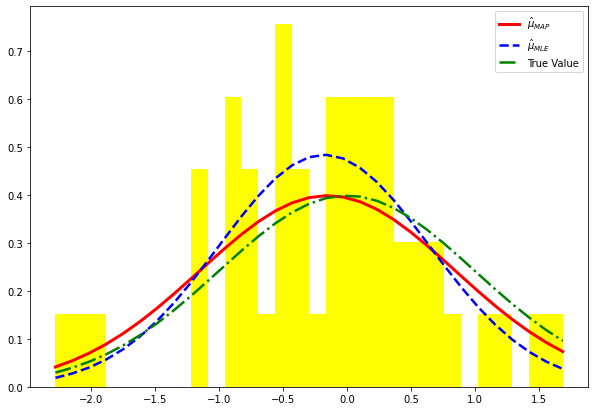

In [56]:
# plotting likelihood, prior and MAP estimate next to each other

figure, ax = plt.subplots(1, figsize=(10,7))

count, bins1, ignored = plt.hist(datapoints1,30, density=True, color = 'yellow')

# scipy's norm function can also be used inplace of this equation.
ax.plot(bins1,norm.pdf(bins1, map_estimate_50_samples , sigma_squared) ,
        linewidth=3, color='r', label = '$\hat{\mu}_{MAP}$ ')

ax.plot(bins1, norm.pdf(bins1,estimated_mu1,estimated_sigma1),'--', lw=2.5,c='b',
           label='$\hat{\mu}_{MLE}$')

ax.plot(bins1, norm.pdf(bins1,0,1),'-.', lw=2.5,c='g',
           label='True Value')

plt.legend()
ax.plot()
plt.show()

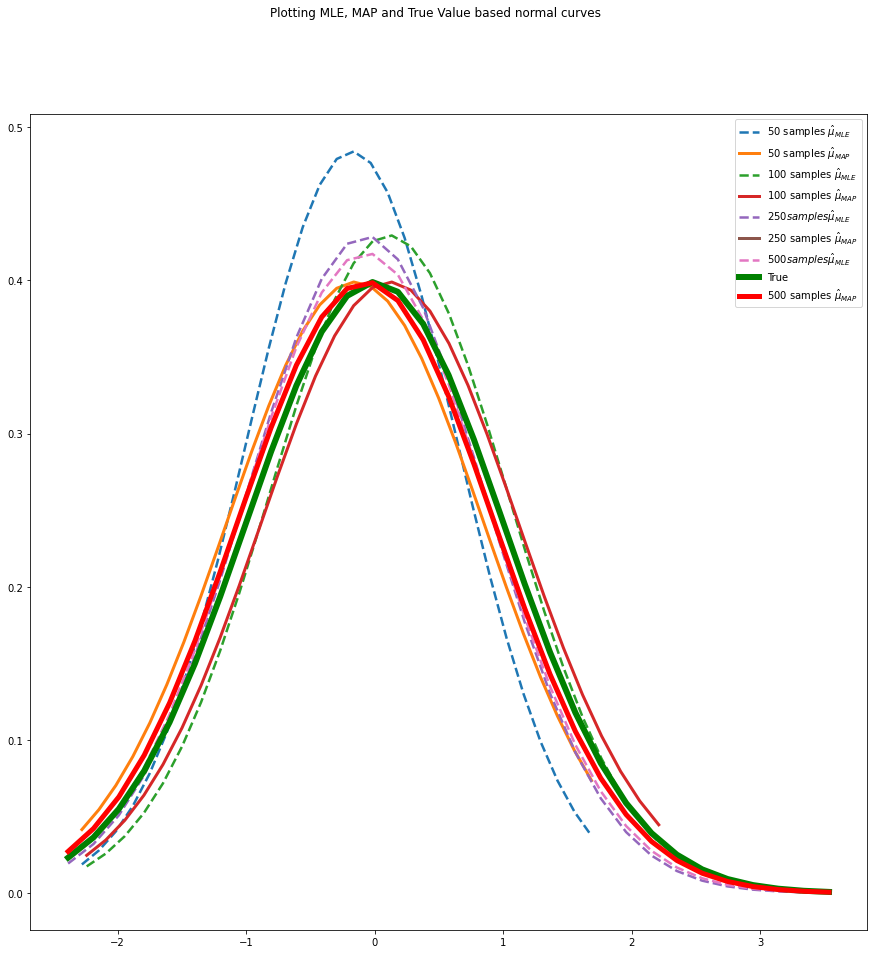

In [64]:
# Examining the behavior of the MAP estimate compared with the MLE estimate and
# the prior

# 1. repeatedly sampling the dataset and observing the variations in the estimate

# for this we use datapoints1, datapoints2, etc.,

fig = plt.figure(figsize=(15,15))
# ax1 = fig.add_subplot(221)
# ax2 = fig.add_subplot(222)
# ax3 = fig.add_subplot(223)
# ax4 = fig.add_subplot(224)

fig.suptitle('Plotting MLE, MAP and True Value based normal curves')


# PLOTTING
# plotting the PDF of Estimated Distribution for subplot 1
plt.plot(bins1, norm.pdf(bins1,estimated_mu1,estimated_sigma1),'--', lw=2.5,
           label='50 samples $\hat{\mu}_{MLE}$')

# plotting the PDF of True Distribution for subplot 1
# ax1.plot(bins1, norm.pdf(bins1,0,1),'-.', lw=2,c='r',
#            label='True')

# plotting the PDF of MAP for subplot 1.
plt.plot(bins1,norm.pdf(bins1, map_estimate_50_samples , sigma_squared) ,
        linewidth=3, label = '50 samples $\hat{\mu}_{MAP}$ ')

# ax1.title.set_text('50 Samples')
plt.legend()


# plotting the PDF of Estimated Distribution for subplot 2
plt.plot(bins2, norm.pdf(bins2,estimated_mu2,estimated_sigma2),'--', lw=2.5,
           label='100 samples $\hat{\mu}_{MLE}$ ')

# # plotting the PDF of True Distribution for subplot 2
# plt.plot(bins2, norm.pdf(bins2,0,1),'-.', lw=2,c='r',
#            label='True')

# plotting the PDF of MAP for subplot 2.
plt.plot(bins2,norm.pdf(bins2, map_estimate_100_samples , sigma_squared) ,
        linewidth=3, label = '100 samples $\hat{\mu}_{MAP}$ ')

# plt.title.set_text('100 Samples')
plt.legend()


# plotting the PDF of Estimated Distribution for subplot 3
plt.plot(bins3, norm.pdf(bins3,estimated_mu3,estimated_sigma3),'--', lw=2.5,
           label='$250 samples \hat{\mu}_{MLE}$ ')

# # plotting the PDF of True Distribution for subplot 3
# plt.plot(bins3, norm.pdf(bins3,0,1),'-.', lw=2,c='r',
#            label='True')
# plotting the PDF of MAP for subplot 2.
plt.plot(bins3,norm.pdf(bins3, map_estimate_250_samples , sigma_squared) ,
        linewidth=3, label = '250 samples $\hat{\mu}_{MAP}$ ')

  
# plt.title.set_text('250 Samples')
plt.legend()


# plotting the PDF of Estimated Distribution for subplot 4
plt.plot(bins4, norm.pdf(bins4,estimated_mu4,estimated_sigma4),'--', lw=2.5,
           label='$ 500 samples \hat{\mu}_{MLE}$')

# plotting the PDF of True Distribution for subplot 4.
plt.plot(bins4, norm.pdf(bins4,0,1), lw=6,c = 'g',
           label='True')

# plotting the PDF of MAP for subplot 4.
plt.plot(bins4,norm.pdf(bins4, map_estimate_500_samples , sigma_squared) ,
        linewidth=5,c = 'r' ,label = '500 samples $\hat{\mu}_{MAP}$ ')


# plt.title.set_text('500 Samples')
plt.legend()


plt.show()



___

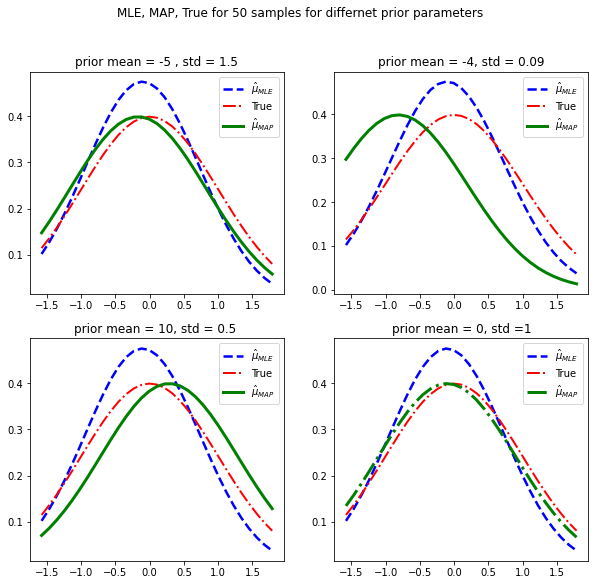

In [ ]:
# Changing the prior parameters to see their effect on the estimate
# MAP_estimated_values on 50 samples and different prior parameters

# using MAP_Estimate(data, prior_nu, prior_beta_squared)

map_estimate_50_samples1 = MAP_Estimate(datapoints1, -5,1.5 )
map_estimate_50_samples2 = MAP_Estimate(datapoints1, -4, .09)
map_estimate_50_samples3 = MAP_Estimate(datapoints1, +10, .5)
map_estimate_50_samples4 = MAP_Estimate(datapoints1, 0, 1)

fig = plt.figure(figsize=(10,9))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

fig.suptitle('MLE, MAP, True for 50 samples for differnet prior parameters')


# PLOTTING
# plotting the PDF of Estimated Distribution for subplot 1
ax1.plot(bins1, norm.pdf(bins1,estimated_mu1,estimated_sigma1),'--', lw=2.5,c='b',
           label='$\hat{\mu}_{MLE}$')

# plotting the PDF of True Distribution for subplot 1
ax1.plot(bins1, norm.pdf(bins1,0,1),'-.', lw=2,c='r',
           label='True')

# plotting the PDF of MAP for subplot 1.
ax1.plot(bins1,norm.pdf(bins1, map_estimate_50_samples1 , sigma_squared) ,
        linewidth=3, color='g', label = '$\hat{\mu}_{MAP}$ ')

ax1.title.set_text('prior mean = -5 , std = 1.5')
ax1.legend()

# plotting the PDF of Estimated Distribution for subplot 2
ax2.plot(bins1, norm.pdf(bins1,estimated_mu1,estimated_sigma1),'--', lw=2.5,c='b',
           label='$\hat{\mu}_{MLE}$')

# plotting the PDF of True Distribution for subplot 2
ax2.plot(bins1, norm.pdf(bins1,0,1),'-.', lw=2,c='r',
           label='True')

# plotting the PDF of MAP for subplot 2
ax2.plot(bins1,norm.pdf(bins1, map_estimate_50_samples2 , sigma_squared) ,
        linewidth=3, color='g', label = '$\hat{\mu}_{MAP}$ ')

ax2.title.set_text('prior mean = -4, std = 0.09')
ax2.legend()

# plotting the PDF of Estimated Distribution for subplot 3
ax3.plot(bins1, norm.pdf(bins1,estimated_mu1,estimated_sigma1),'--', lw=2.5,c='b',
           label='$\hat{\mu}_{MLE}$')

# plotting the PDF of True Distribution for subplot 3
ax3.plot(bins1, norm.pdf(bins1,0,1),'-.', lw=2,c='r',
           label='True')

# plotting the PDF of MAP for subplot 3
ax3.plot(bins1,norm.pdf(bins1, map_estimate_50_samples3 , sigma_squared) ,
        linewidth=3, color='g', label = '$\hat{\mu}_{MAP}$ ')

ax3.title.set_text('prior mean = 10, std = 0.5 ')
ax3.legend()

# plotting the PDF of Estimated Distribution for subplot 4
ax4.plot(bins1, norm.pdf(bins1,estimated_mu1,estimated_sigma1),'--', lw=2.5,c='b',
           label='$\hat{\mu}_{MLE}$')

# plotting the PDF of True Distribution for subplot 4
ax4.plot(bins1, norm.pdf(bins1,0,1),'-.', lw=2,c='r',
           label='True')

# plotting the PDF of MAP for subplot 4
ax4.plot(bins1,norm.pdf(bins1, map_estimate_50_samples4 , sigma_squared) ,
        linewidth=3, color='g', ls='-.', label = '$\hat{\mu}_{MAP}$ ')

ax4.title.set_text('prior mean = 0, std =1')
ax4.legend()
plt.show()

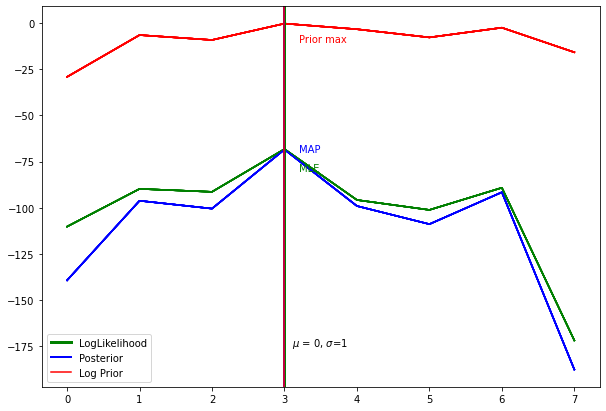

In [ ]:
# Plot the likelihood, prior and the MAP objective next to each other, 
# together with the MLE and MAP estimates and the prior maximum.


figure, ax = plt.subplots(1, figsize=(10,7))

# DEFINING FUNCTION FOR LOG PRIOR
def LogPrior(nu, mu , beta):
  x = np.log(1/(beta * np.sqrt(2 * np.pi)) * np.exp( - (nu - mu)**2 / (2 * beta**2) ) )
  return x


# LogPrior(nu, mu , beta)

LogPriorArray = LogPrior(0.3, mu1, 0.3)
Posterior = LogPriorArray + np.asarray(LogLikelihood)


for i in range(len(mu1)):
  ax.plot(np.arange(0, len(mu1), 1), LogPriorArray, c = 'red')
  ax.plot(np.arange(0, len(mu1),1), LogLikelihood, c ='g' )
  ax.plot(np.arange(0, len(mu1),1), Posterior, c= 'b')

# plt.axvline(2)
plt.axvline(np.argmax(LogLikelihood), lw =3, label='LogLikelihood', c='g')
plt.axvline(np.argmax(Posterior), lw =2,label='Posterior', c='b')
plt.axvline(np.argmax(LogPriorArray), c='red', label='Log Prior')

ax.annotate("Prior max", (3.2,-10), c='r')
ax.annotate("MLE", (3.2,-80), c='g')
ax.annotate("MAP", (3.2,-70), c='b')
ax.annotate("$\mu$ = 0, $\sigma$=1", (3.1,-175), c='black')
ax.legend()
plt.show()